In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
import pims
from scipy import stats

%matplotlib inline

## Choose image directory

In [10]:
path='/Users/taldankovich/Documents/20170912_LTP/'
channel=0 #channel to evaluate

### Calculate the entropy of the images using PyImageQualityRanking

In [5]:
#activate python 2.7 environment
! source activate python27
! pyimq.main --mode=directory --mode=analyze --working-directory=path --rgb-channel=channel \
--file=results.csv 
! source deactivate

Traceback (most recent call last):
  File "/Users/taldankovich/anaconda/bin/pyimq.main", line 6, in <module>
    from pkg_resources import load_entry_point
  File "/Users/taldankovich/anaconda/lib/python3.6/site-packages/pkg_resources/__init__.py", line 3147, in <module>
    @_call_aside
  File "/Users/taldankovich/anaconda/lib/python3.6/site-packages/pkg_resources/__init__.py", line 3131, in _call_aside
    f(*args, **kwargs)
  File "/Users/taldankovich/anaconda/lib/python3.6/site-packages/pkg_resources/__init__.py", line 3160, in _initialize_master_working_set
    working_set = WorkingSet._build_master()
  File "/Users/taldankovich/anaconda/lib/python3.6/site-packages/pkg_resources/__init__.py", line 666, in _build_master
    ws.require(__requires__)
  File "/Users/taldankovich/anaconda/lib/python3.6/site-packages/pkg_resources/__init__.py", line 984, in require
    needed = self.resolve(parse_requirements(requirements))
  File "/Users/taldankovich/anaconda/lib/python3.6/site-package

In [26]:
path2=path+'/2018-04-12_PyIQ_output/19-30-35_PyIQ_analyze_out.csv'
results=pd.DataFrame.from_csv(path2)

In [25]:
len(results['Filename'])

56

In [27]:
results.columns
results_by_entropy.head()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
0,/Users/taldankovich/Documents/20170912_LTP/201...,0.969838,2239860.0,38.316302,3264.367548,179.696506,4.877807,2.281250e+09,3153.847924,0.387942,...,0.505321,1.000000,0.000000,0.930466,0.126707,1.000000,0.491993,0.553970,0.036816,1.000000
1,/Users/taldankovich/Documents/20170912_LTP/201...,4.253599,58109890.0,13.883702,6369.402593,152.720733,5.215562,2.276169e+09,6262.236067,0.128642,...,0.985977,0.849881,0.150119,0.994894,0.710416,0.478995,0.976894,0.963702,0.955143,0.362345
2,/Users/taldankovich/Documents/20170912_LTP/201...,4.276335,59352793.0,13.964301,6450.071312,141.192287,4.880697,2.276169e+09,6329.016910,0.164040,...,0.998464,0.785726,0.214274,0.931017,0.630730,0.328407,0.987312,1.000000,0.975572,0.364448
3,/Users/taldankovich/Documents/20170912_LTP/201...,4.319935,47182785.0,15.764086,5871.276021,139.464809,5.153341,2.276169e+09,5800.093045,0.441710,...,0.908867,0.776113,0.223887,0.983025,0.005670,0.113322,0.904801,0.896821,0.775536,0.411420
4,/Users/taldankovich/Documents/20170912_LTP/201...,4.299720,54262997.0,14.523286,6277.906251,138.945433,5.235516,2.276169e+09,6147.574331,-0.144681,...,0.971813,0.773223,0.226777,0.998700,0.674309,0.451414,0.959007,0.938857,0.891912,0.379037


In [28]:
results_by_entropy=results.sort_values(by=['fSTD'],ascending=False)
results_by_entropy=results_by_entropy.reset_index(drop=True)

/Users/taldankovich/anaconda/lib/python3.6/site-packages/tifffile/tifffile.py:1948: UserWarning: invalid ImageJ metadata or corrupted file
  warnings.warn("invalid ImageJ metadata or corrupted file")
/Users/taldankovich/anaconda/lib/python3.6/site-packages/tifffile/tifffile.py:2784: UserWarning: invalid page offset (1058618)
  warnings.warn("invalid page offset (%i)" % offset)


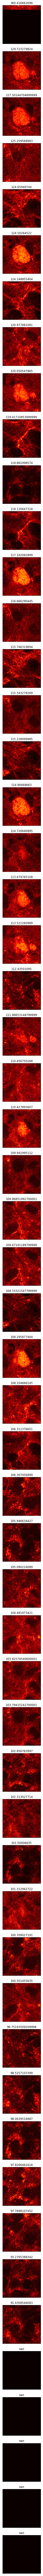

In [29]:
fig=plt.figure(figsize=(50,200))
no_images=len(results_by_entropy["Filename"])

for i in range(0,no_images):
    
    im = pims.open(results_by_entropy["Filename"][i])
    TNR_image=im[0]
    #Aggrecan_image=im[1]

    fig.add_subplot(no_images,1,i+1)
    plt.imshow(TNR_image,interpolation='none',cmap='hot')
    plt.title(results_by_entropy["fSTD"][i])  
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

        
